In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

In [46]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [47]:
X_train.shape, y_train.shape, "**********", X_test.shape, y_test.shape

((60000, 28, 28), (60000,), '**********', (10000, 28, 28), (10000,))

In [48]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [49]:
y_train[0]

9

In [50]:
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot" ]

In [51]:
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle Boot']

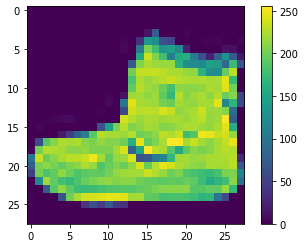

In [52]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()

In [53]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

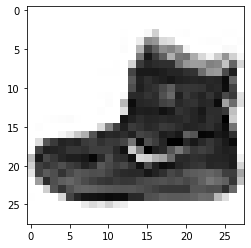

In [54]:
plt.imshow(X_train[0], cmap = "Greys")

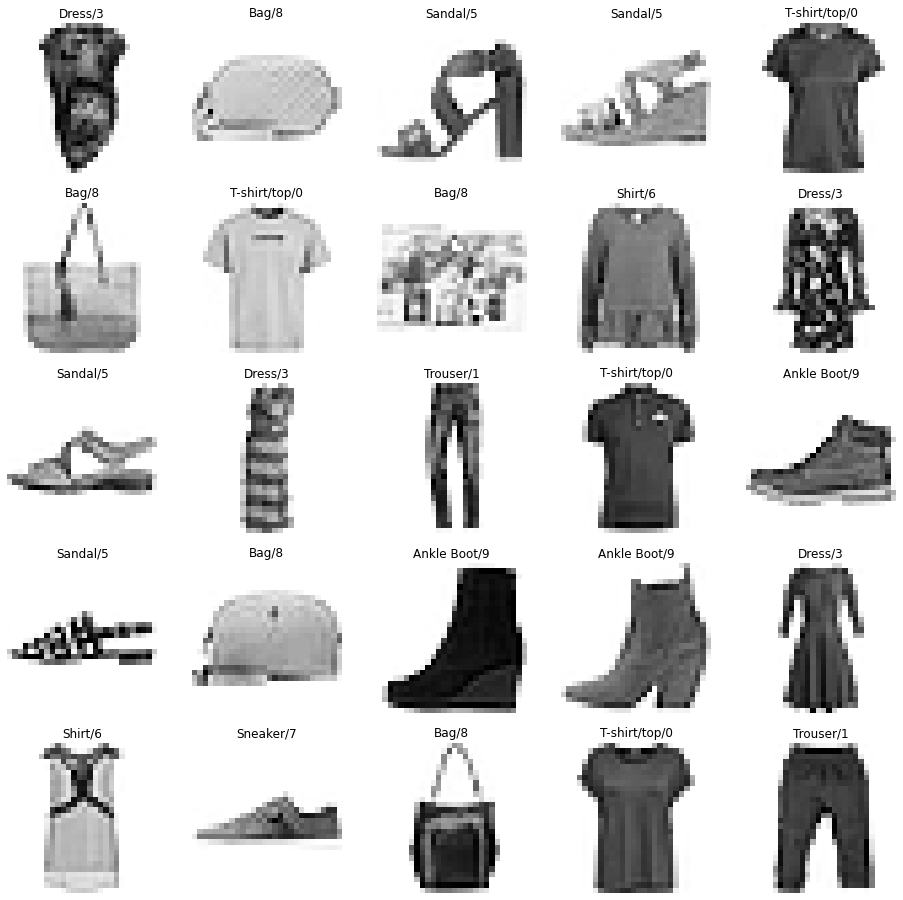

In [55]:
plt.figure(figsize=(16,16))

j = 1
for i in np.random.randint(0,1000,25):
    plt.subplot(5,5,j);j+=1
    plt.imshow(X_train[i], cmap='Greys')
    plt.axis('off')
    plt.title('{}/{}'.format(class_labels[y_train[i]],y_train[i]))

In [56]:
X_train.ndim

3

In [57]:
X_train = np.expand_dims(X_train,-1)

In [58]:
X_train.ndim

4

In [59]:
X_test = np.expand_dims(X_test, -1)

In [60]:
X_train = X_train/255
X_test = X_test/255

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_Validation = train_test_split(X_train, y_train,test_size=0.2,random_state=2020)

In [62]:
X_train.shape, X_validation.shape,y_train.shape,y_Validation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

In [63]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid', activation='relu', input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])

In [64]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               692352    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________________________________________________

In [65]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [66]:
model.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(X_validation,y_Validation))

Epoch 1/10
94/94 [==============================] - 16s 159ms/step - loss: 0.6442 - accuracy: 0.7818 - val_loss: 0.4344 - val_accuracy: 0.8496
Epoch 2/10
94/94 [==============================] - 17s 178ms/step - loss: 0.3846 - accuracy: 0.8656 - val_loss: 0.3676 - val_accuracy: 0.8743
Epoch 3/10
94/94 [==============================] - 15s 165ms/step - loss: 0.3381 - accuracy: 0.8819 - val_loss: 0.3344 - val_accuracy: 0.8844
Epoch 4/10
94/94 [==============================] - 17s 185ms/step - loss: 0.3054 - accuracy: 0.8917 - val_loss: 0.3309 - val_accuracy: 0.8817
Epoch 5/10
94/94 [==============================] - 18s 190ms/step - loss: 0.2820 - accuracy: 0.9006 - val_loss: 0.2997 - val_accuracy: 0.8950
Epoch 6/10
94/94 [==============================] - 14s 146ms/step - loss: 0.2625 - accuracy: 0.9071 - val_loss: 0.2971 - val_accuracy: 0.8959
Epoch 7/10
94/94 [==============================] - 14s 154ms/step - loss: 0.2476 - accuracy: 0.9116 - val_loss: 0.2822 - val_accuracy: 0.9031

In [67]:
y_pred = model.predict(X_test)
y_pred.round(2)

array([[0.  , 0.  , 0.  , ..., 0.04, 0.  , 0.96],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.24, 0.09, 0.  ]], dtype=float32)

In [68]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [69]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2807 - accuracy: 0.8983


[0.2806868851184845, 0.8982999920845032]

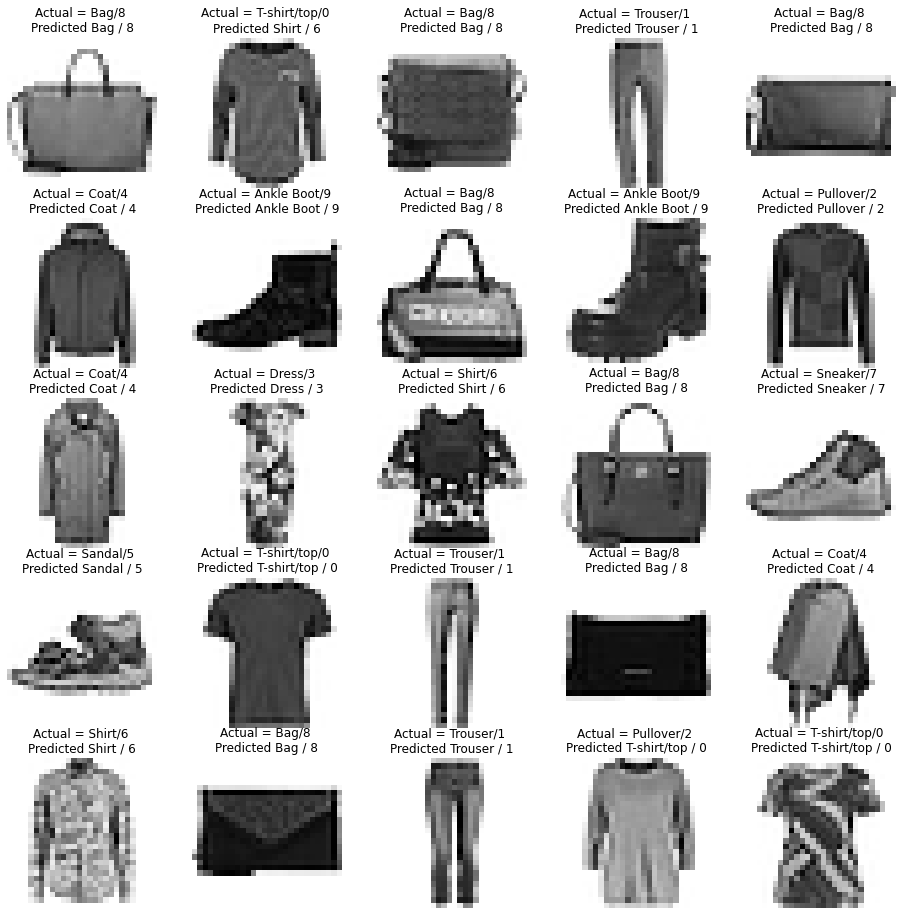

In [70]:
plt. figure(figsize=(16,16))
j=1
for i in np.random.randint(0, 1000,25):
    plt.subplot(5,5, j); j+=1
    plt.imshow(X_test[i].reshape(28,28), cmap='Greys')
    plt.title('Actual = {}/{} \nPredicted {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels [np.argmax(y_pred[i])],np.argmax(y_pred[i])))
    plt.axis("off")

In [71]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9)) 
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

<Figure size 1152x648 with 0 Axes>

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.87      0.85      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.81      0.87      0.84      1000
       Dress       0.94      0.86      0.90      1000
        Coat       0.82      0.88      0.85      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.76      0.67      0.71      1000
     Sneaker       0.92      0.98      0.95      1000
         Bag       0.97      0.98      0.97      1000
  Ankle Boot       0.98      0.94      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



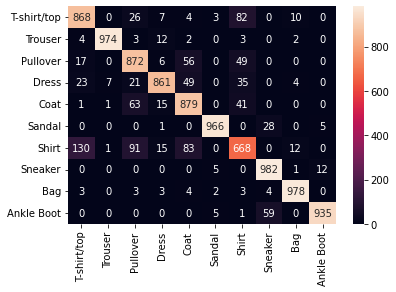

In [72]:
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)
from sklearn.metrics import classification_report 
cr= classification_report (y_test, y_pred_labels, target_names=class_labels) 
print(cr)

In [73]:
model.save("Fashion_cnn_models.h5")